<a href="https://colab.research.google.com/github/Pranami-54/Financial_Analysis/blob/main/Financial_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Analyzing Competition Among Top Companies

In [1]:
import pandas as pd

Get the Data

In [2]:
df = pd.read_csv('/content/Financial Analytics data.csv')

In [3]:
df.head()

,S.No.,Name,Mar Cap - Crore,Sales Qtr - Crore,Unnamed: 4
0,1,Reliance Inds.,583436.72,99810.00,NaN
1,2,TCS,563709.84,30904.00,NaN
2,3,HDFC Bank,482953.59,20581.27,NaN
3,4,ITC,320985.27,9772.02,NaN
4,5,H D F C,289497.37,16840.51,NaN


In [4]:
df = df.drop(columns=['Unnamed: 4'])

In [5]:
df.shape

(488, 4)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              488 non-null    int64  
 1   Name               488 non-null    object 
 2   Mar Cap - Crore    479 non-null    float64
 3   Sales Qtr - Crore  365 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 15.4+ KB


Check Duplicates

In [7]:
df.duplicated().value_counts()

False    488
Name: count, dtype: int64

In [8]:
df.drop_duplicates(inplace = True)
df.shape

(488, 4)

Checking missing value

In [9]:
df.isnull().sum()

S.No.                  0
Name                   0
Mar Cap - Crore        9
Sales Qtr - Crore    123
dtype: int64

In [10]:
df['Mar Cap - Crore'].fillna(df['Mar Cap - Crore'].median(), inplace=True)
df['Sales Qtr - Crore'].fillna(df['Sales Qtr - Crore'].median(), inplace=True)

In [11]:
df.isnull().sum()

S.No.                0
Name                 0
Mar Cap - Crore      0
Sales Qtr - Crore    0
dtype: int64

In [12]:
df.describe()

,S.No.,Mar Cap - Crore,Sales Qtr - Crore
count,488.000000,488.000000,488.000000
mean,251.508197,27708.961086,3610.168955
std,145.884078,58963.329098,9684.943920
min,1.000000,3017.070000,47.240000
25%,122.750000,4879.612500,725.732500
50%,252.500000,9885.050000,1278.300000
75%,378.250000,23400.815000,2084.097500
max,500.000000,583436.720000,110666.930000


Key Metrics

In [20]:
#Total Market Capitalization
df['Mar Cap - Crore'].sum()

13521973.01

In [21]:
#Total Quarterly Sales
df['Sales Qtr - Crore'].sum()

1761762.4499999997

In [22]:
#Average Market Capitalization
df['Mar Cap - Crore'].mean()

27708.961086065574

In [23]:
#Average Quarterly Sales
df['Sales Qtr - Crore'].mean()

3610.1689549180323

In [25]:
#Top 10 Companies by Market Capitalization
df.nlargest(10, 'Mar Cap - Crore')

,S.No.,Name,Mar Cap - Crore,Sales Qtr - Crore
0,1,Reliance Inds.,583436.72,99810.00
1,2,TCS,563709.84,30904.00
2,3,HDFC Bank,482953.59,20581.27
3,4,ITC,320985.27,9772.02
4,5,H D F C,289497.37,16840.51
5,6,Hind. Unilever,288265.26,8590.00
6,7,Maruti Suzuki,263493.81,19283.20
7,8,Infosys,248320.35,17794.00
8,9,O N G C,239981.50,22995.88
9,10,St Bk of India,232763.33,57014.08


In [26]:
#Top  10 Companies by Quarterly Sales
df.nlargest(10, 'Sales Qtr - Crore')

,S.No.,Name,Mar Cap - Crore,Sales Qtr - Crore
14,15,I O C L,178017.48,110666.93
0,1,Reliance Inds.,583436.72,99810.00
23,24,Tata Motors,117071.87,74156.07
27,28,B P C L,98278.00,60616.36
54,55,H P C L,58034.78,57474.25
9,10,St Bk of India,232763.33,57014.08
122,123,Rajesh Exports,23495.54,41304.84
40,41,Tata Steel,73376.14,32464.14
1,2,TCS,563709.84,30904.00
13,14,Larsen & Toubro,180860.74,28747.45


Visualization

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

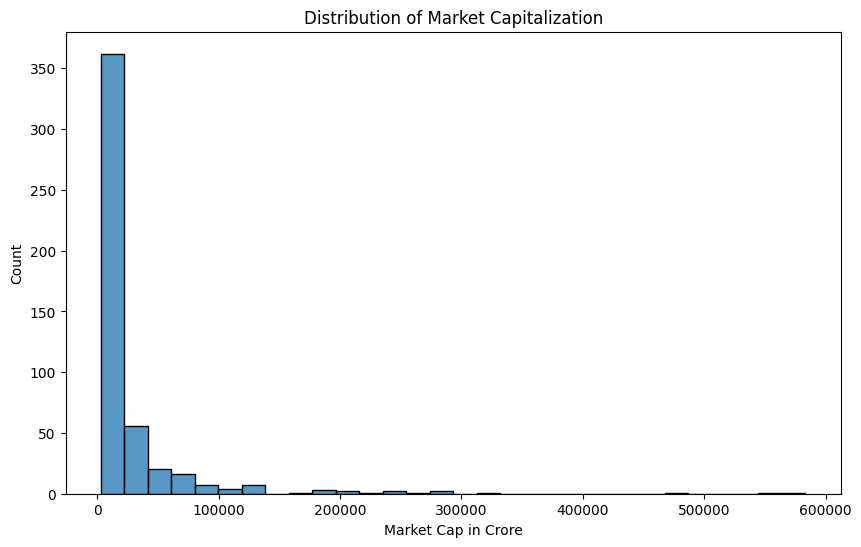

In [28]:
# Distribution of Market Capitalization
plt.figure(figsize=(10,6))
sns.histplot(df['Mar Cap - Crore'],bins=30)
plt.title('Distribution of Market Capitalization')
plt.xlabel('Market Cap in Crore')
plt.show()

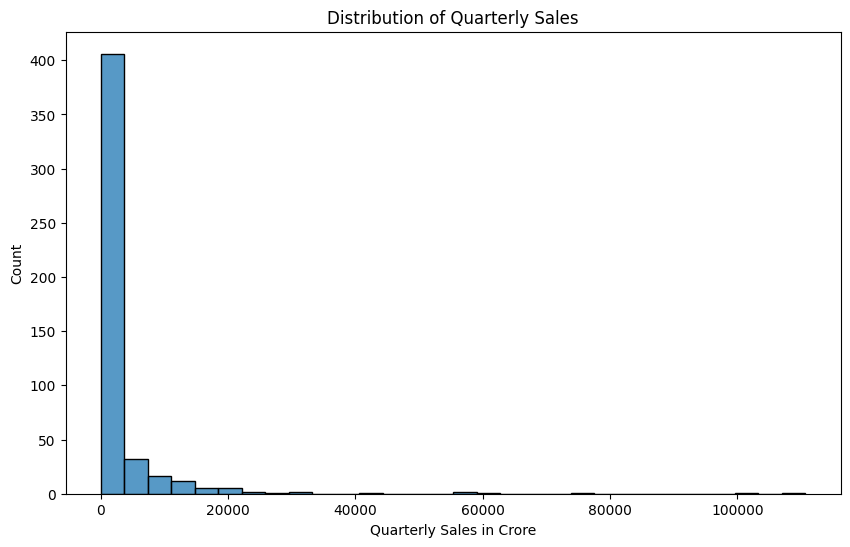

In [29]:
# Distribution of Quarterly Sales
plt.figure(figsize=(10,6))
sns.histplot(df['Sales Qtr - Crore'],bins=30)
plt.title('Distribution of Quarterly Sales')
plt.xlabel('Quarterly Sales in Crore')
plt.show()

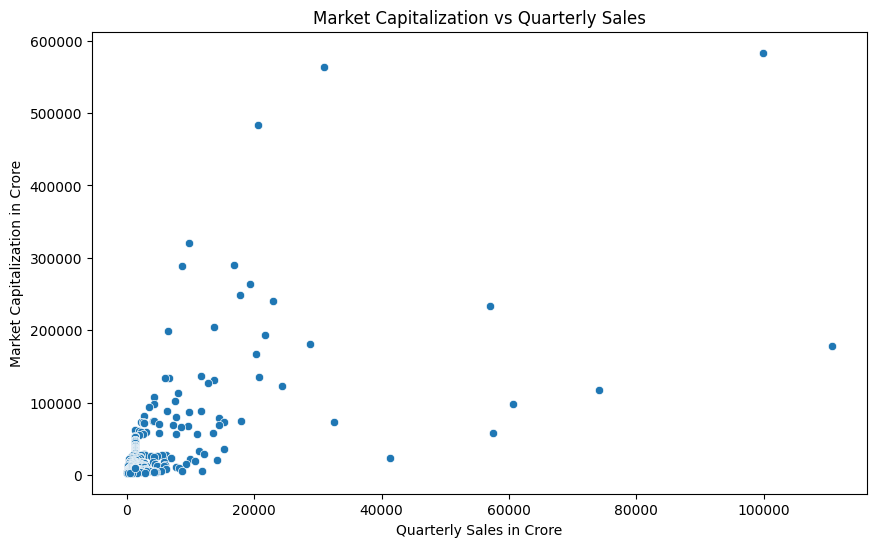

In [30]:
# Scatter plot of Market Capitalization vs Quarterly Sales
plt.figure(figsize=(10,6))
sns.scatterplot(x='Sales Qtr - Crore', y='Mar Cap - Crore', data=df)
plt.title('Market Capitalization vs Quarterly Sales')
plt.xlabel('Quarterly Sales in Crore')
plt.ylabel('Market Capitalization in Crore')
plt.show()

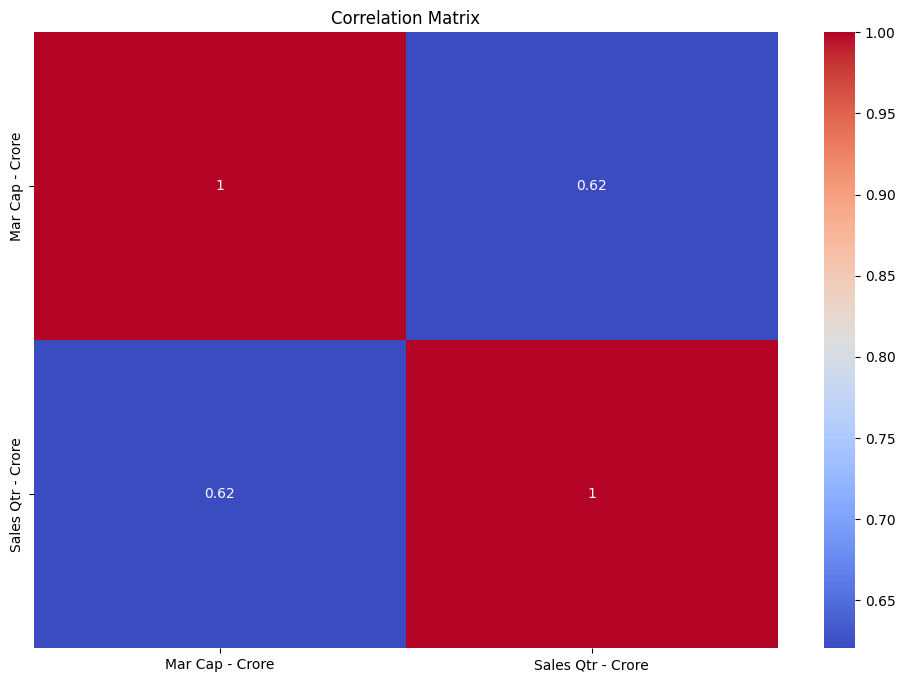

In [35]:
correlation = df[['Mar Cap - Crore', 'Sales Qtr - Crore']].corr()
plt.figure(figsize=(12,8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()